In [1]:
%pylab inline
import numpy as np
from scipy import *

Populating the interactive namespace from numpy and matplotlib


## Finding a line passing through 2 points

Suppose we are given two points in $R^2$: $[-1,2]$ and $[1,1]$, and we want to find a line passing through these points.

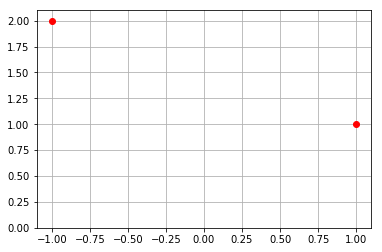

In [23]:
p=np.array([[-1,2],[1,1]])
plot(p[:,0],p[:,1],'ro')
xlim([-1.1,1.1])
ylim([0,2.1])
grid()

Any line (other than vertical) can be expressed as $y=w_0+w_1x$ where $[x,y]$ are points along the line $w_0$ y-axis intercept and $w_1$ is the slope.

To identify the line that passes through the two points we need to find $w_0,w_1$ that satisfy two constraints:

* The point $[x,y]=[-1,2]$ implies the constraint $w_0-w_1=2$
* The point $[x,y]=[1,1]$ implies the constraint $w_0+w_1=1$

### Writing equations in matrix form
There are many ways to solve the equations, i.e. find $w_x,w_y$ that satisfy both constraints. Here we describe a numerical method that is implemented as part of `numpy`

We use matrix notation to define:
* The coefficients matrix ${\bf A} = \begin{equation}
\begin{bmatrix} 1 & -1 \\
	   1 & 1	
\end{bmatrix}
\end{equation} $
* The *ordinate* or *dependent variable* vector: ${\bf b}=\begin{bmatrix} 2 \\ 1	\end{bmatrix}$
* The parameter vector ${\bf w} = \begin{bmatrix} w_0 \\ w_1	\end{bmatrix}$

We can write the two equations in matrix form as follows:
$$
\begin{equation}
\begin{bmatrix} 1 & -1 \\
	   1 & 1	
\end{bmatrix}
\begin{bmatrix} w_0 \\ w_1	
\end{bmatrix}
=
\begin{bmatrix} 2 \\ 1	
\end{bmatrix}
\end{equation}
$$
Which we can write succinctly as ${\bf A w = b}$

In [28]:
from numpy.linalg import solve
A = np.array([[1,-1], [1,1]])
b = np.array([2,1])
w = solve(A, b)
w

array([ 1.5, -0.5])

In [29]:
def F(x,w):
    return w[0]+w[1]*x
print 'F(-1)=',F(-1,w)
print 'F(1)=',F(1,w)    

F(-1)= 2.0
F(1)= 1.0


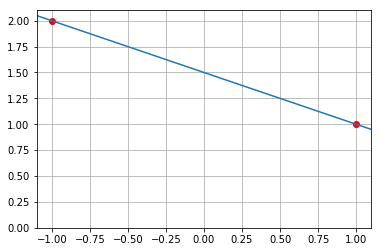

In [32]:
plot(p[:,0],p[:,1],'ro')
_xlim=[-1.1,1.1]
xlim(_xlim)
ylim([0,2.1])
plot(_xlim,[F(_xlim[0],w),F(_xlim[1],w)])
grid()

### When can you use `numpy.linlag.solve` ?
The function `numpy.linlag.solve` can be used to solve a set of $n$ linear equations with $n$ unknowns.

You simply express the set of equation in a matrix format ${\bf Ax=b}$ and call `solve` using `x=solve(A,b)` the returned value is a vector with the solution for ${\bf x}$.

However the number of equations and the number of unknowns must be equal. 
* If the number of equations is **smaller** that the number of unknowns we say that the system is **underdetermined** or **singular**. It means that we don't have enough information to specify a unique solution. In data analysis this would rarely be the case.
* If the number of equations is **larger** than the number of unknowns we say that the system if **overdetermined**. It means that there is no solution that satisfies all of the constraints. In data analysis this is a very common occurance, and we will discuss it in the next notebook.

### Example
Find the solution for the following set of 3 equations:
$$
x+y-z=5 \\
z+2y=3 \\
y-x=4
$$

In [44]:
# Solution
A=np.array([[1,1,-1],[0,2,1],[-1,1,0]])
b=np.array([5,3,4])
solve(A,b)

array([-1.,  3., -3.])

Which means that the solution is $x=-1,y=3,z=-3$

Check that the solution is correct, i.e. that it satisfies the three constraints.

### Homework
write a function called `eqn_solution` which gets as input a 1D array `b` with 5 entries and returns the solution for the parameters $(x,y,z,s,t)$ 
for the following set of equations: 
$$
x+y+z=b[0] \\
t-y=b[1] \\
x-z=b[2] \\
y+z+s=b[3] \\
t-x=b[4]
$$


In [46]:
A=np.array([[1,1,1,0,0],\
            [0,-1,0,0,1],\
            [1,0,-1,0,0],\
            [0,1,1,1,0],\
            [-1,0,0,0,1]])
b=np.array([1,1,1,1,1])
x,y,z,s,t=solve(A,b)
print x+y+z,t-y,x-z,y+z+s,t-x

1.0 1.0 1.0 1.0 1.0


In [33]:
from numpy.linalg import lstsq

In [34]:
lstsq?

In [35]:
import scipy

In [38]:
import scipy.linalg

In [39]:
scipy.linalg?

In [40]:
numpy.linalg?